11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 79s 38ms/step - loss: 0.3373 - accuracy: 0.8916 - val_loss: 0.1494 - val_accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1098 - accuracy: 0.9664 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.0840 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0678 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0541 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [======

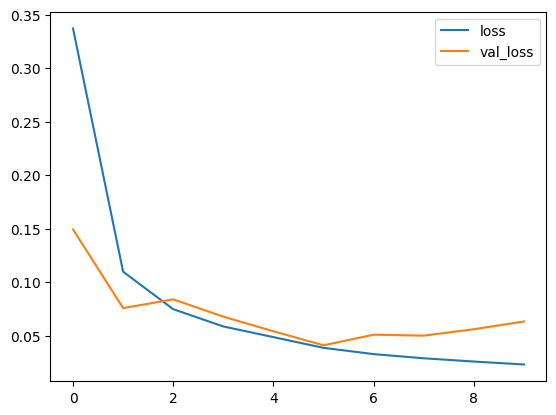

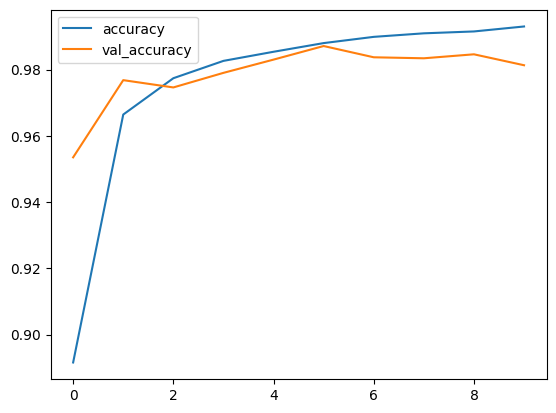

313/313 [==============================] - 4s 12ms/step
Confusion matrix, without normalization
[[ 970    0    0    0    2    0    6    2    0    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   0    7 1011    0    1    0    1   12    0    0]
 [   0    0    3  999    0    2    0    4    1    1]
 [   0    0    0    0  974    0    5    1    0    2]
 [   2    1    1   13    2  862    1    6    1    3]
 [   0    2    0    1    1    1  952    0    1    0]
 [   0    4    5    2    1    0    0 1016    0    0]
 [   2    1    2    3    6    1    0   10  946    3]
 [   4    1    1    2   27    1    1   20    1  951]]


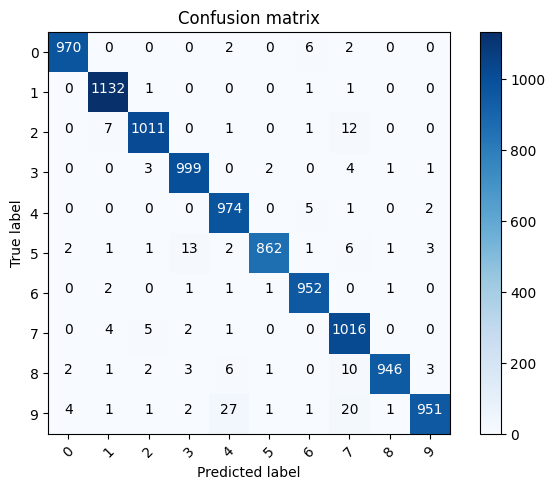

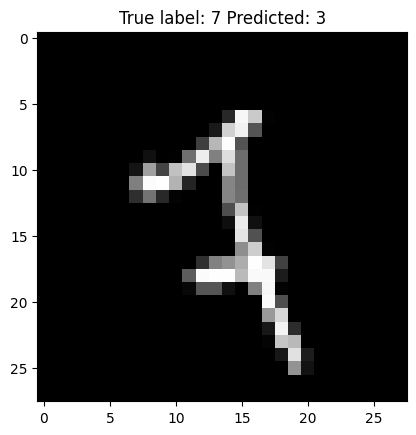

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shape of the training data
print("x_train.shape:", x_train.shape)

# Build the LSTM model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Predict the labels of the test data
p_test = model.predict(x_test).argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]} Predicted: {p_test[i]}")
plt.show()
